# implementation of K Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=5,random_state=3)

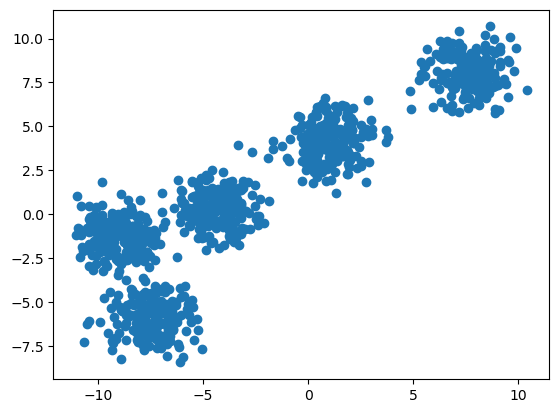

In [4]:
plt.scatter(x[:, 0],x[:, 1])
plt.show()

In [5]:
k=5
colors=["green", "blue", "red", "yellow", "gray"]
clusters={}
for each_cluster in range(k):
    #1.to initialize cluster centre randomly.
    center=10*(2*np.random.random((x.shape[1],))-1)
    points=[]
    cluster={
        'center':center,
        'points':points,
        'color':colors[each_cluster]
    }
    clusters[each_cluster]=cluster

In [6]:
clusters

{0: {'center': array([2.83645803, 8.53389938]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-0.35617345,  8.90476457]),
  'points': [],
  'color': 'blue'},
 2: {'center': array([-4.09294825,  8.68202599]),
  'points': [],
  'color': 'red'},
 3: {'center': array([ 4.99714276, -4.64232328]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([0.19163421, 5.47933016]), 'points': [], 'color': 'gray'}}

In [7]:
#distance and assigning points to clusters
def distance(v1,v2):
    return np.sqrt(np.sum((v2-v1))**2)

In [8]:
#assigning every data point to one cluster
#expectation step
def assignPointsToClusters(clusters):
    
    for every_data_point in range(x.shape[0]):
        dist=[]
        current_x = x[every_data_point]
        for kx in range(k):
            d= distance(current_x ,clusters[kx]['center'])
            dist.append(d)
        
        current_cluster= np.argmin(dist)
        clusters[current_cluster]['points'].append(x[every_data_point])   

In [9]:
#maximisation step
def updateClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if(pts.shape[0] >0):
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]

In [10]:
def plotClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0 :
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
            plt.scatter(clusters[kx]['center'][0],clusters[kx]['center'][1],color='black',marker='*')

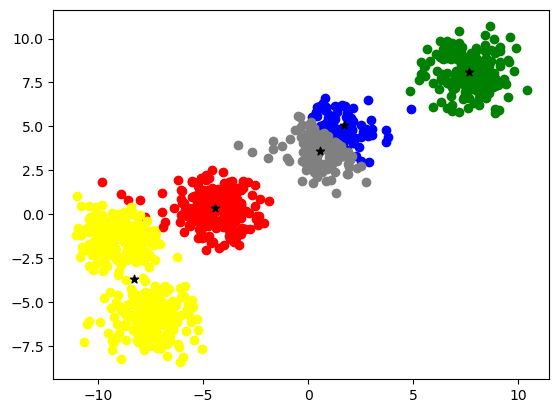

In [31]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

# If more number of times, we will call instruction at line 28, we will get more optimal solutions.

# K mean clustering will not work for complex datasets like the one shown on line-31.

# Rectifying the problem using Density Based Scan(DBScan):

In [154]:
import matplotlib.pyplot as plt

In [155]:
from sklearn.datasets import make_moons

x,y =make_moons(n_samples=200, noise=0.10)

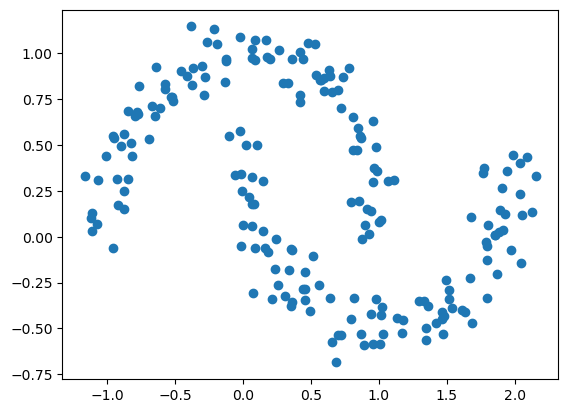

In [156]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [157]:
from sklearn.cluster import KMeans

In [158]:
km=KMeans(n_clusters=2)
km.fit(x)

KMeans(n_clusters=2)

In [159]:
centers=km.cluster_centers_
label=km.labels_

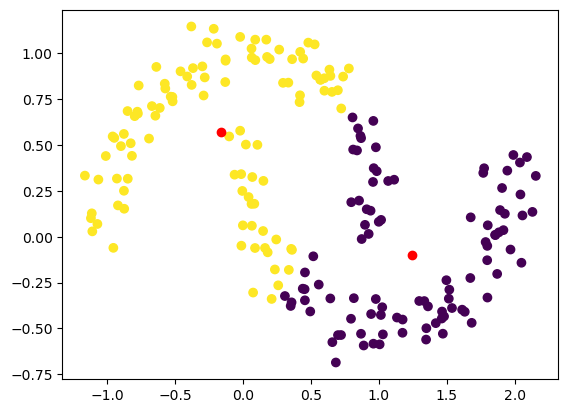

In [160]:
plt.scatter(x[:,0],x[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1],color='red')
plt.show()

# Clustering is not performed well use DBScan

In [161]:
from sklearn.cluster import DBSCAN

In [162]:
dbs=DBSCAN(eps=0.2, min_samples=1)

In [163]:
dbs.fit(x)

DBSCAN(eps=0.2, min_samples=1)

In [164]:
ypred=dbs.fit_predict(x)

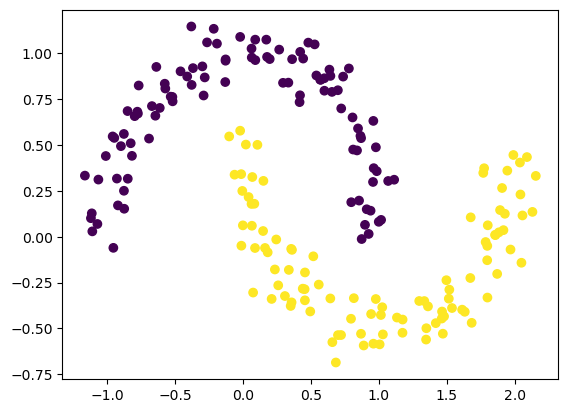

In [165]:
plt.scatter(x[:,0],x[:,1],c=ypred)

# Better clustering is performed.